## Temperature delta as function of RH and T

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import curve_fit

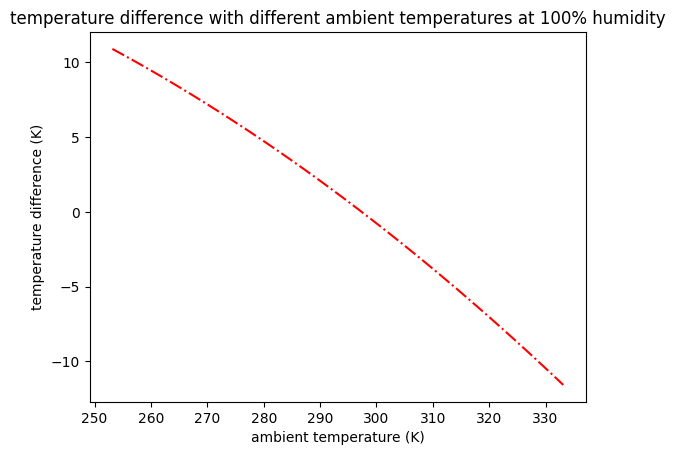

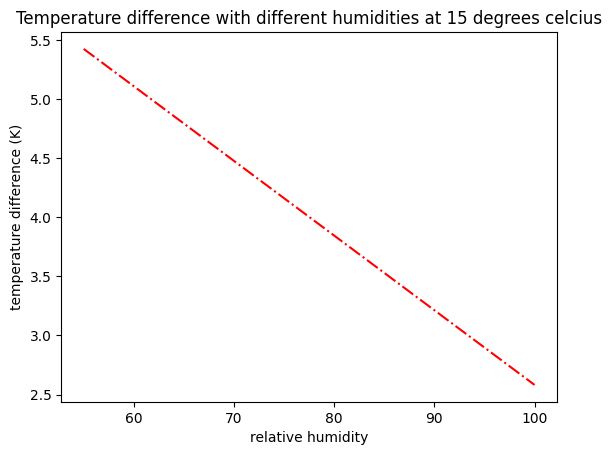

In [31]:
a = 6 #coefficient for IR radiation in atmospheric window per Kelvin
b = 1336 #constant for IR radiation in atmospheric window
e_rc = 0.85 #emissivity of material in atmospheric window
d = 0.27 #dew temperature constant
c = 0.0038 #dew temperature coefficient
Sun = 40 # W/m^2
hc = 15 #W/m^2 K
def emissivity(Tvalue,RHvalue):
    T = np.atleast_1d(Tvalue)
    RH = np.atleast_1d(RHvalue)
    emissivities = np.zeros((len(RH),len(T)))
    for i in range(len(T)):
        e = 1- 0.83*0.41*np.exp(-0.46*RH/100*np.exp(0.068*(T[i]- 13 - 273.15)))
        emissivities[:,i] = e
    return emissivities


def delta_T(T_val,RH_val):
    T = np.atleast_1d(T_val)
    RH = np.atleast_1d(RH_val)
    delta_T = np.zeros((len(RH),len(T)))
    for i in range(len(T)):
        e_atm = c*(T[i]-((100-RH)/5))-d
        delta_T_values = T[i]*(1-(e_atm+hc/a/e_rc)/(1+hc/a/e_rc))-b*e_atm*(1-e_rc)/(a*e_rc+hc) -Sun/(a*e_rc+hc)
        delta_T[:,i] = np.transpose(delta_T_values)
    return delta_T
def Pwater(T_val,RH_val):
    T = np.atleast_1d(T_val)
    RH = np.atleast_1d(RH_val)
    Pwater = np.zeros((len(RH),len(T)))
    for i in range(len(T)):
        e_atm = emissivity(T[i],RH)[0]
        Pwater_values = (a*T[i]-b)*e_rc*(1-e_atm) - ((100-RH)/5)* (a*e_rc+hc) - Sun + 20*e_atm*e_rc*a
        Pwater[:,i] = np.transpose(Pwater_values)
    return Pwater

Ttest = np.linspace(253.15, 333.15, 100)
RHtest = np.linspace(55,100,50)

plt.figure()
plt.plot(Ttest, delta_T(Ttest,100)[0], 'r-.')
plt.xlabel('ambient temperature (K)')
plt.ylabel('temperature difference (K)')
plt.title('temperature difference with different ambient temperatures at 100% humidity')
plt.show()
plt.figure()
plt.plot(RHtest, delta_T(273.15+15,RHtest), 'r-.')
plt.xlabel('relative humidity')
plt.ylabel('temperature difference (K)')
plt.title('Temperature difference with different humidities at 15 degrees celcius')
plt.show()

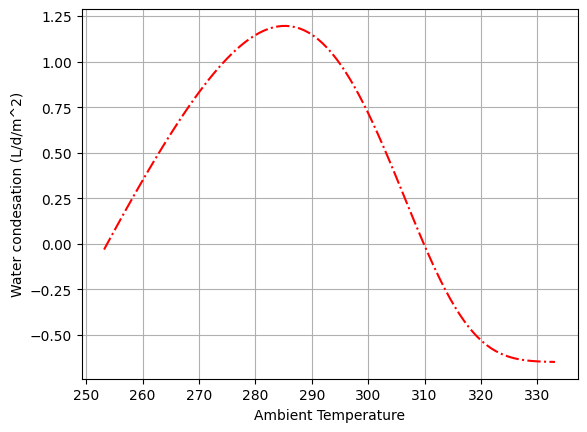

In [ ]:
L = 2.447*10**6 #J/L latent heat of evaporation water
P = Pwater(Ttest, 80)[0] #power in J/s
dm = P*3600*24 / L #litres generated per day

plt.figure()
plt.plot(Ttest, dm, 'r-.')
plt.xlabel('Ambient Temperature (K)')
plt.ylabel('Water condesation (L/d/m^2)')
plt.grid()
plt.show()

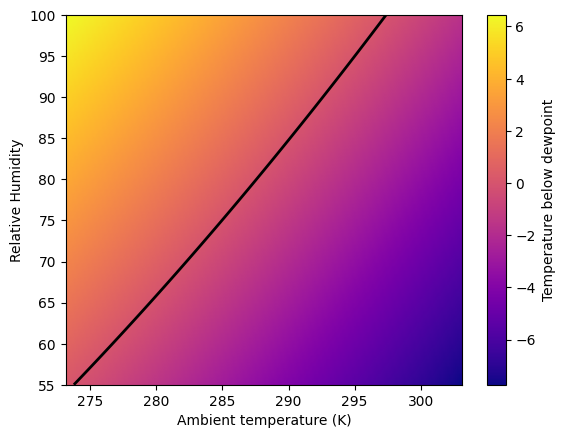

In [4]:
T = np.linspace(273.15,303.15, 200)
RH = np.linspace(55,100, 100)

Tdew = np.zeros((len(RH),len(T)))
for i in range(len(T)):
    Tdew_val = (100-RH)/5
    Tdew[:,i] = Tdew_val


delta_Ts = delta_T(T,RH)
below_dew = delta_Ts - Tdew

plt.figure()
plt.imshow(below_dew, cmap = 'plasma', origin = 'lower', aspect = 'auto', extent = [T[0],T[-1], RH[0], RH[-1]])
plt.colorbar(label = 'Temperature below dewpoint')
plt.xlabel('Ambient temperature (K)')
plt.ylabel('Relative Humidity')
contours = plt.contour(T, RH, below_dew, levels = [0], colors = 'k', linewidths = 2)
plt.show()